### Problem Statement

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.  

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market.  

### Business Goal 

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the cars dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
cars = pd.read_csv(r'D:\NC\Trail_DS\Linear Regression Assignment\CarPrice_Assignment.csv')

In [4]:
# Check the head of the dataset
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Inspect the various aspects of the cars dataframe

In [5]:
cars.shape

(205, 26)

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [7]:
#calculate percentage of null values in each column
colwise_percent_missingvalues = 100 * cars.isnull().sum()/len(cars)
colwise_percent_missingvalues

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

In [8]:
#count the number of null values in each column
cars.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Since there are no missing values no need for missing values treatment. Also we do not need the car_ID column, so let's drop it.

In [9]:
#drop column car_ID
cars = cars.drop(['car_ID'], axis = 1)

In [10]:
#Splitting company name from CarName column
CompanyName = cars['CarName'].apply(lambda x : x.split(' ')[0])
cars.insert(3,"CompanyName",CompanyName)
cars.drop(['CarName'],axis=1,inplace=True)
cars.head()

,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [12]:
cars.CompanyName = cars.CompanyName.str.lower()

In [13]:
cars.CompanyName.replace('maxda','mazda',inplace=True)
cars.CompanyName.replace('porcshce','porsche',inplace=True)
cars.CompanyName.replace('toyouta','porsche',inplace=True)
cars.CompanyName.replace('vokswagen','volkswagen',inplace=True)
cars.CompanyName.replace('vw','volkswagen',inplace=True)

In [14]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [15]:
#Checking for duplicates
cars.loc[cars.duplicated()]

,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [16]:
cars.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

<Figure size 2880x864 with 0 Axes>

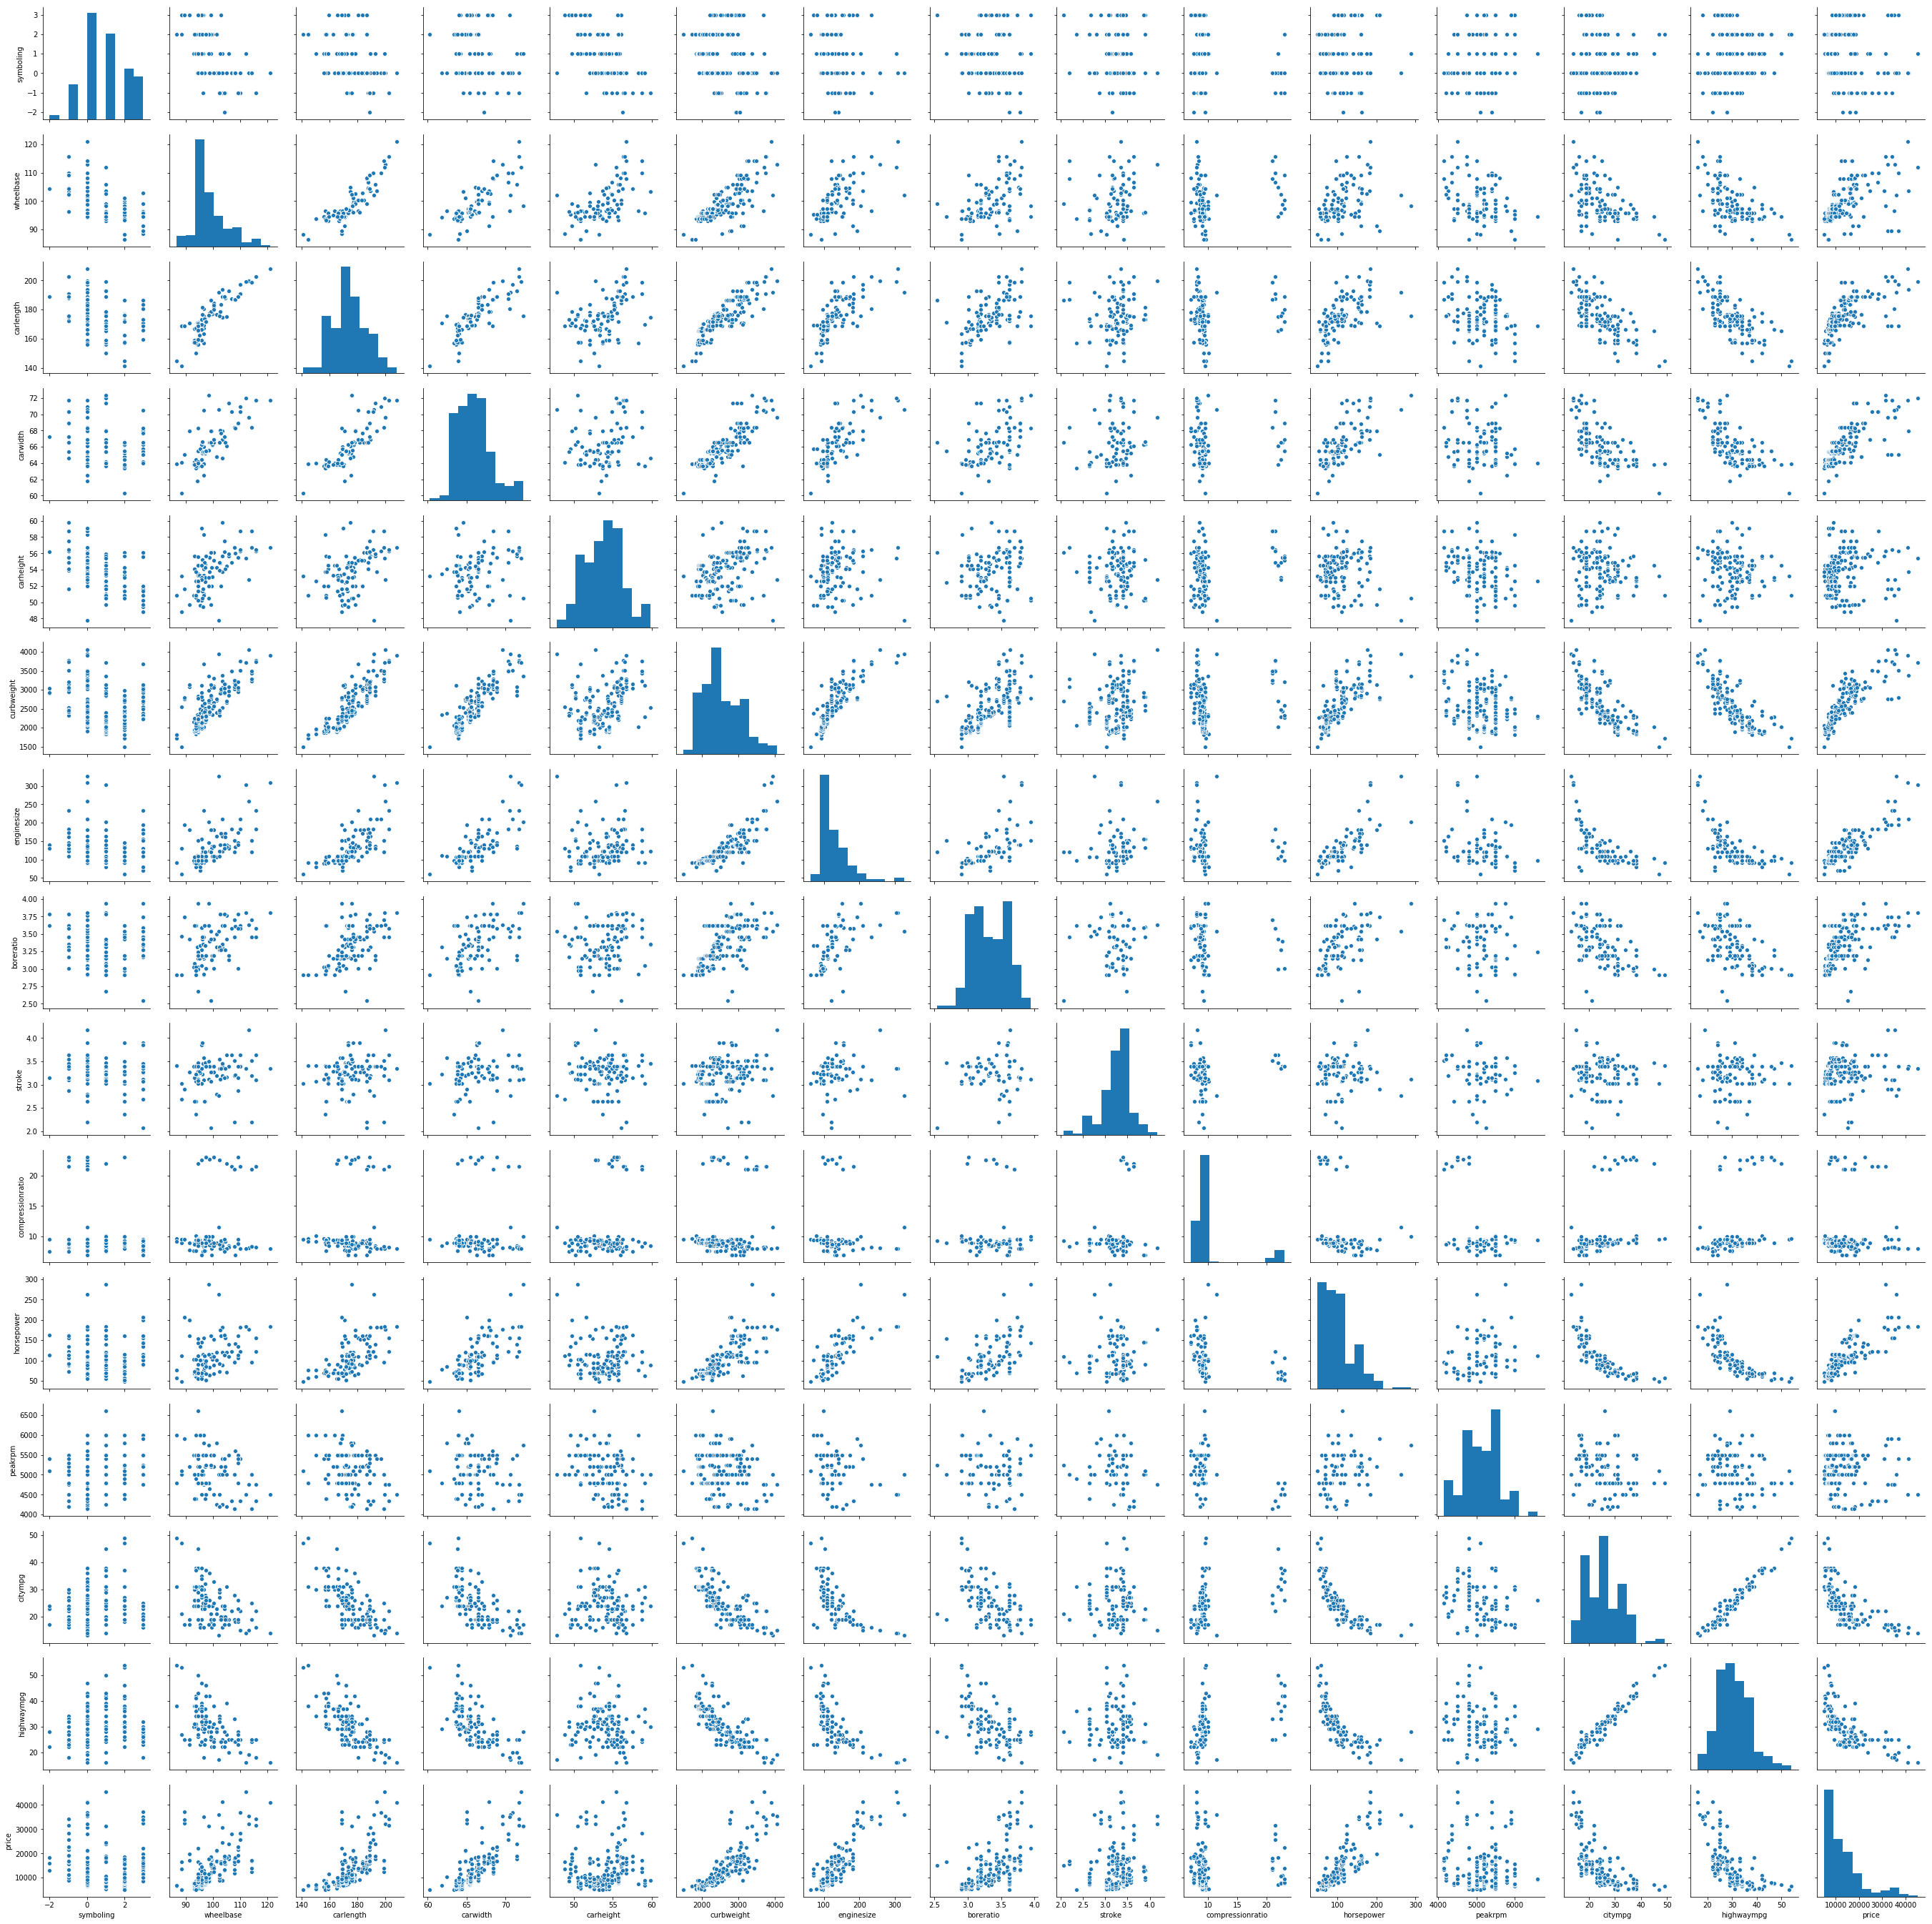

In [18]:
plt.figure(figsize=(40, 12))
sns.pairplot(cars)
plt.show()

As observed, there is a positive correlation between:
 - price and wheelbase
 - price and carlength
 - price and carwidth
 - price and curbweight
 - price and enginesize
 - price and boreratio
 - price and horsepower
 
and negative correlation between:
 - price and citympg
 - price and highwaympg
 
Also, there is correlation between other variables:
- carlength and wheelbase
- highwaympg and citympg
- highwaympg and enginesize, etc.
 
This explains there is multicollinearity amongst other variables


In [19]:
correlationval = cars.corr()
round(correlationval, 2)

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.00,-0.53,-0.36,-0.23,-0.54,-0.23,-0.11,-0.13,-0.01,-0.18,0.07,0.27,-0.04,0.03,-0.08
wheelbase,-0.53,1.00,0.87,0.80,0.59,0.78,0.57,0.49,0.16,0.25,0.35,-0.36,-0.47,-0.54,0.58
carlength,-0.36,0.87,1.00,0.84,0.49,0.88,0.68,0.61,0.13,0.16,0.55,-0.29,-0.67,-0.70,0.68
carwidth,-0.23,0.80,0.84,1.00,0.28,0.87,0.74,0.56,0.18,0.18,0.64,-0.22,-0.64,-0.68,0.76
carheight,-0.54,0.59,0.49,0.28,1.00,0.30,0.07,0.17,-0.06,0.26,-0.11,-0.32,-0.05,-0.11,0.12
curbweight,-0.23,0.78,0.88,0.87,0.30,1.00,0.85,0.65,0.17,0.15,0.75,-0.27,-0.76,-0.80,0.84
enginesize,-0.11,0.57,0.68,0.74,0.07,0.85,1.00,0.58,0.20,0.03,0.81,-0.24,-0.65,-0.68,0.87
boreratio,-0.13,0.49,0.61,0.56,0.17,0.65,0.58,1.00,-0.06,0.01,0.57,-0.25,-0.58,-0.59,0.55
stroke,-0.01,0.16,0.13,0.18,-0.06,0.17,0.20,-0.06,1.00,0.19,0.08,-0.07,-0.04,-0.04,0.08
compressionratio,-0.18,0.25,0.16,0.18,0.26,0.15,0.03,0.01,0.19,1.00,-0.20,-0.44,0.32,0.27,0.07


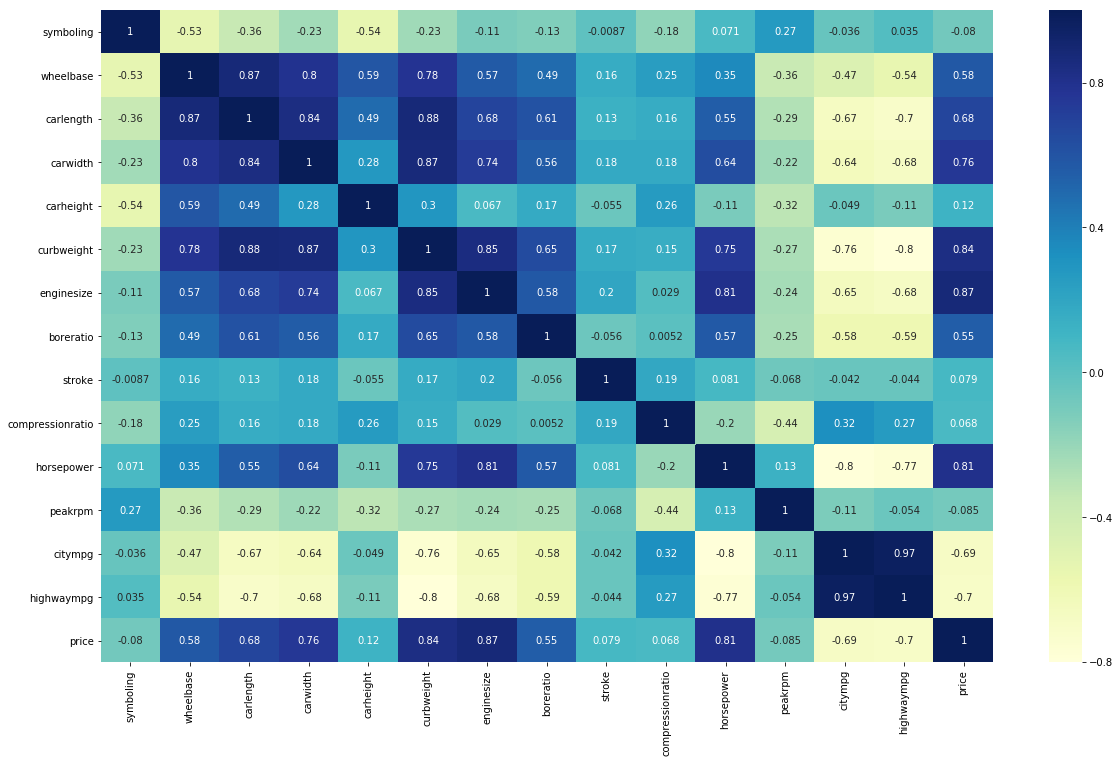

In [20]:
plt.figure(figsize=(20, 12))
sns.heatmap(correlationval, cmap="YlGnBu", annot=True)
plt.show()

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

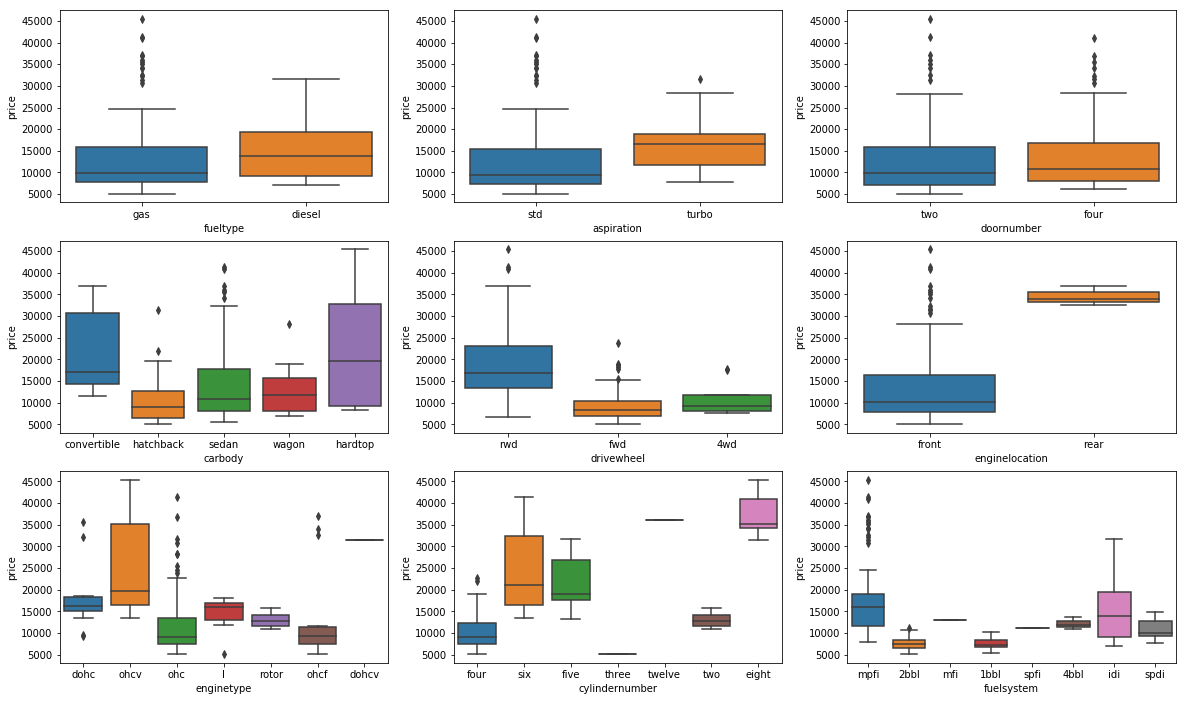

In [21]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = cars)
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = cars)
plt.subplot(3,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = cars)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = cars)
plt.subplot(3,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = cars)
plt.subplot(3,3,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = cars)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = cars)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = cars)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = cars)
plt.show()

As observed,
 - fueltype, aspiration, doornumber does not have much impact on the price
 - when carbody is hatchback, sedan or wagon the prices are lower whereas cars with carbody convertible and hardtop have prices in varied ranges
 - cars with drivewheel fwd and 4wd have low prices
 - cars with enginelocation rear have high prices as compared to front enginelocation
 - cars with ohcv enginetype have price high while all others have comparatively low prices
 - cars price increases with the number of cylinders
 - fuelsystem does not have  much impact on car prices

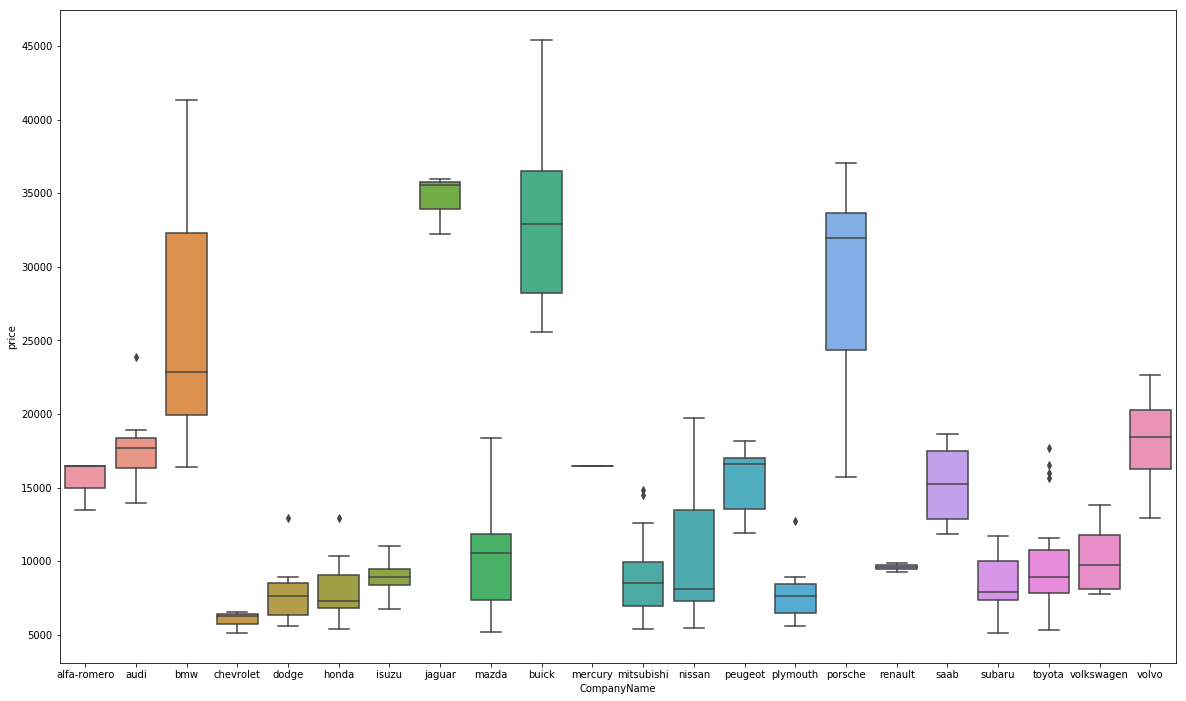

In [22]:
plt.figure(figsize=(20, 12))
sns.boxplot(x = 'CompanyName', y = 'price', data = cars)

As observed, BMW, Buick, Jaguar and Porsche have high price while all other are having moderately low prices.

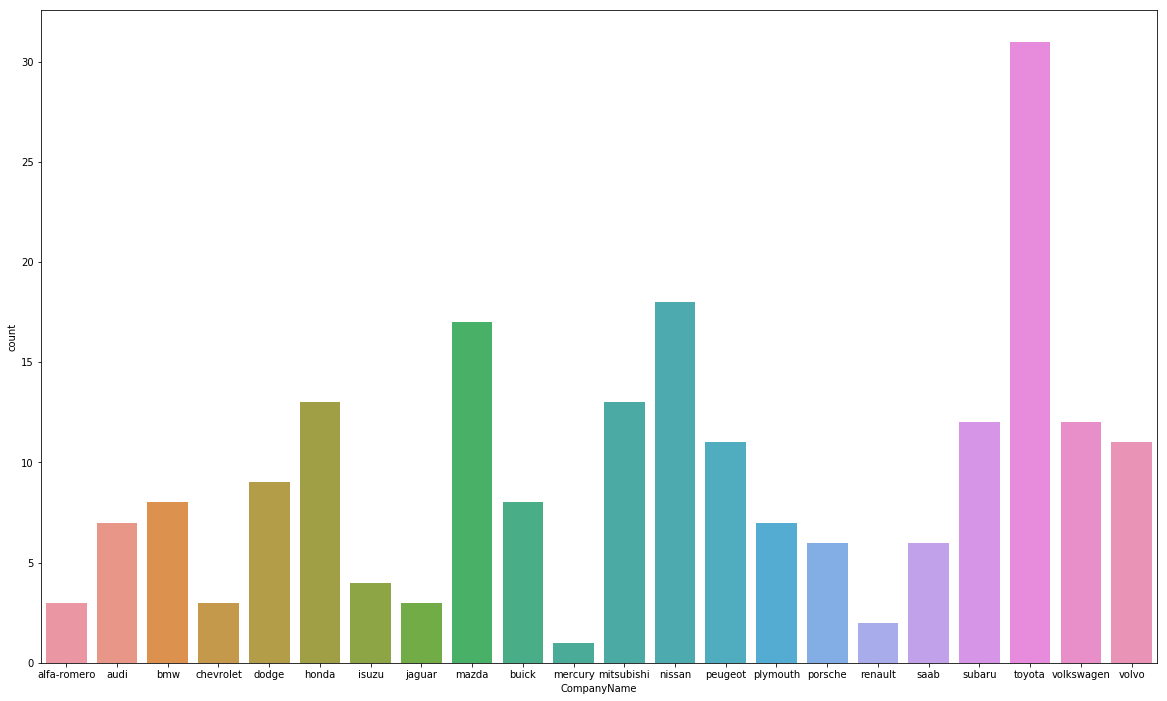

In [23]:
plt.figure(figsize=(20, 12))
sns.countplot(x="CompanyName", data=cars)

As observed, Toyota is amongst the most preffered car whereas Mercury is the least

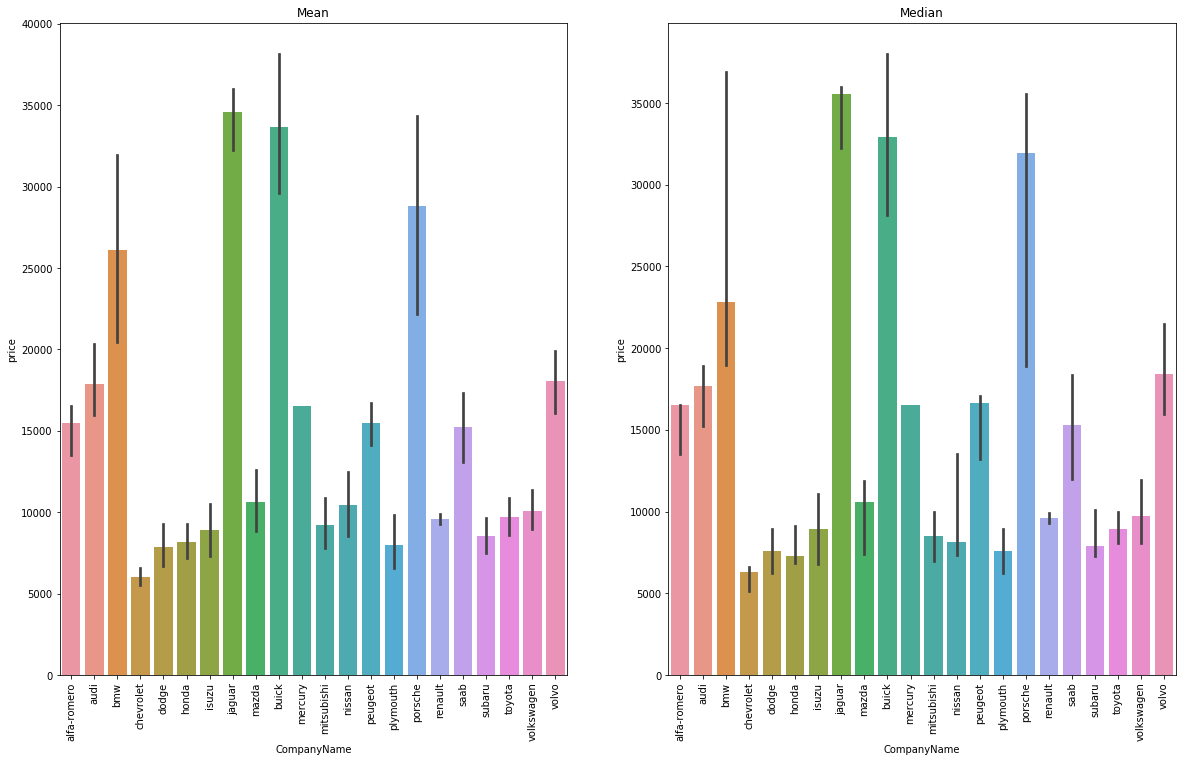

In [24]:
plt.figure(figsize=(20, 12))
plt.subplot(1,2,1)
sns.barplot(x='CompanyName', y='price', data=cars)
plt.title('Mean')
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
sns.barplot(x='CompanyName', y='price', data=cars, estimator=np.median)
plt.title('Median')
plt.xticks(rotation = 90)
plt.show()

As observed, the mean and median prices of cars of various companies is almost same.

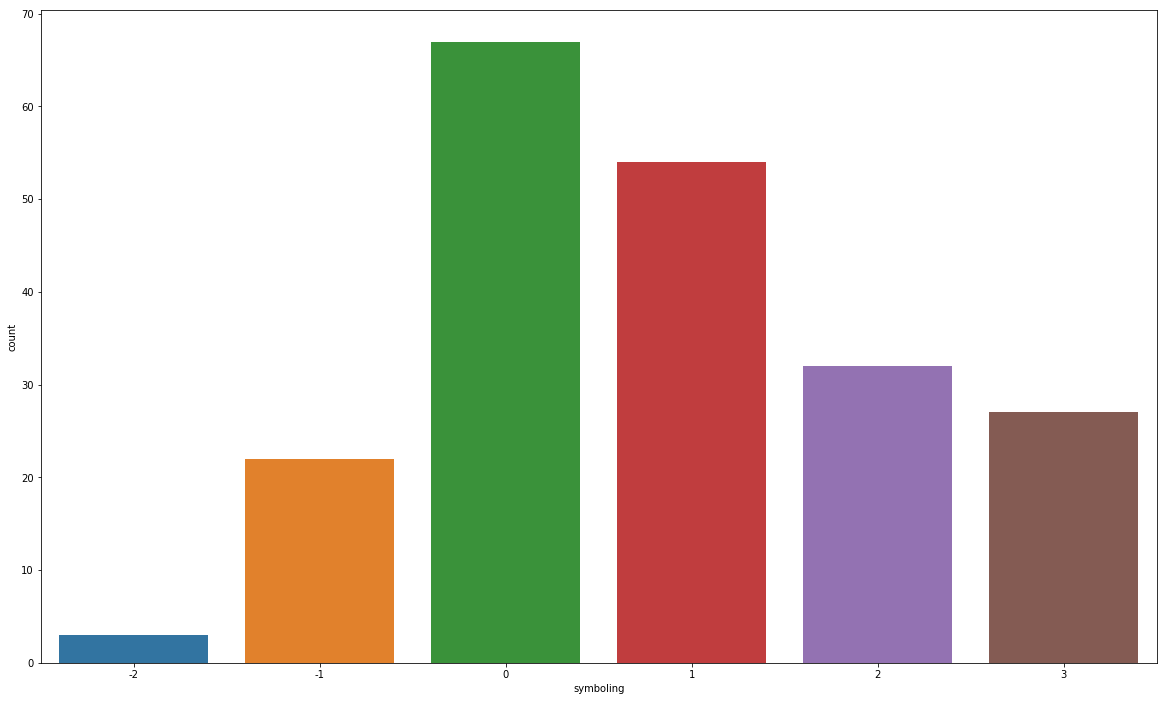

In [25]:
plt.figure(figsize=(20, 12))
sns.countplot(x="symboling", data=cars)

As observed, cars with 0 and 1 symboling are the most preferred as it as low risk.

## Step 3: Data Preparation

In [26]:
#Binning the Car Companies based on avg prices of each Company.
cars['price'] = cars['price'].astype('int')
temp = cars.copy()
temp.head()

,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [27]:
table = temp.groupby(['CompanyName'])['price'].mean()
table

CompanyName
alfa-romero    15498.333333
audi           17859.142857
bmw            26118.750000
buick          33647.000000
chevrolet       6007.000000
dodge           7875.444444
honda           8184.692308
isuzu           8916.250000
jaguar         34600.000000
mazda          10652.882353
mercury        16503.000000
mitsubishi      9239.769231
nissan         10415.666667
peugeot        15489.090909
plymouth        7963.428571
porsche        28792.000000
renault         9595.000000
saab           15223.333333
subaru          8541.250000
toyota          9696.645161
volkswagen     10077.500000
volvo          18063.181818
Name: price, dtype: float64

In [28]:
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
temp.head()

,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price_x,price_y
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,15498.333333
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,15498.333333
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,15498.333333
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,17859.142857
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,17859.142857


In [29]:
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
cars['PriceRange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
cars.head()

,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,PriceRange
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,Medium
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,Medium
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,Medium
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,Medium
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,Medium


### Dummy Variables

The variable `PriceRange` has three levels. We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables`.

In [30]:
# Get the dummy variables for the feature 'PriceRange' and store it in a new variable - 'status'
status = pd.get_dummies(cars['PriceRange'])
status.head()

,Budget,Medium,Highend
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [31]:
# Let's drop the last column from status df using 'drop_first = True'

status = pd.get_dummies(cars['PriceRange'], drop_first = True)

In [32]:
# Add the results to the original cars dataframe

cars = pd.concat([cars, status], axis = 1)

In [33]:
# Now let's see the head of our dataframe.

cars.head()

,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,PriceRange,Medium,Highend
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,13495,Medium,1,0
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,16500,Medium,1,0
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,3.47,9.0,154,5000,19,26,16500,Medium,1,0
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,3.40,10.0,102,5500,24,30,13950,Medium,1,0
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,3.40,8.0,115,5500,18,22,17450,Medium,1,0


In [34]:
# Drop 'PriceRange' and 'CompanyName' as we have created the dummies for it

cars.drop(['PriceRange', 'CompanyName'], axis = 1, inplace = True)
cars.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Medium,Highend
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,13495,1,0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,16500,1,0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,2.68,3.47,9.0,154,5000,19,26,16500,1,0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,3.19,3.40,10.0,102,5500,24,30,13950,1,0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,3.19,3.40,8.0,115,5500,18,22,17450,1,0


In [35]:
status = pd.get_dummies(cars['fueltype'])

In [36]:
# Check what the dataset 'status' looks like
status.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [37]:
# Let's drop the last column from status df using 'drop_first = True'

status = pd.get_dummies(cars['fueltype'], drop_first = True)

In [38]:
# Add the results to the original cars dataframe

cars = pd.concat([cars, status], axis = 1)

In [39]:
# Now let's see the head of our dataframe.

cars.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Medium,Highend,gas
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,2.68,9.0,111,5000,21,27,13495,1,0,1
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,2.68,9.0,111,5000,21,27,16500,1,0,1
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,3.47,9.0,154,5000,19,26,16500,1,0,1
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,3.40,10.0,102,5500,24,30,13950,1,0,1
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,3.40,8.0,115,5500,18,22,17450,1,0,1


In [40]:
# Drop 'fueltype' as we have created the dummies for it

cars.drop(['fueltype'], axis = 1, inplace = True)

In [41]:
cars.head()

,symboling,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Medium,Highend,gas
0,3,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,2.68,9.0,111,5000,21,27,13495,1,0,1
1,3,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,2.68,9.0,111,5000,21,27,16500,1,0,1
2,1,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,3.47,9.0,154,5000,19,26,16500,1,0,1
3,2,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,3.40,10.0,102,5500,24,30,13950,1,0,1
4,2,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,3.40,8.0,115,5500,18,22,17450,1,0,1


In [42]:
status = pd.get_dummies(cars['aspiration'])
status.head()

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [43]:
# Let's drop the last column from status df using 'drop_first = True'

status = pd.get_dummies(cars['aspiration'], drop_first = True)

In [44]:
# Add the results to the original cars dataframe

cars = pd.concat([cars, status], axis = 1)

In [45]:
cars.drop(['aspiration'], axis = 1, inplace = True)
cars.head()

,symboling,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Medium,Highend,gas,turbo
0,3,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,...,9.0,111,5000,21,27,13495,1,0,1,0
1,3,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,...,9.0,111,5000,21,27,16500,1,0,1,0
2,1,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,...,9.0,154,5000,19,26,16500,1,0,1,0
3,2,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,...,10.0,102,5500,24,30,13950,1,0,1,0
4,2,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,...,8.0,115,5500,18,22,17450,1,0,1,0


In [46]:
status = pd.get_dummies(cars['carbody'])
status.head()

,convertible,hardtop,hatchback,sedan,wagon
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [47]:
# Let's drop the last column from status df using 'drop_first = True'

status = pd.get_dummies(cars['carbody'], drop_first = True)

In [48]:
# Add the results to the original cars dataframe

cars = pd.concat([cars, status], axis = 1)

In [49]:
cars.drop(['carbody'], axis = 1, inplace = True)
cars.head()

,symboling,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,...,highwaympg,price,Medium,Highend,gas,turbo,hardtop,hatchback,sedan,wagon
0,3,two,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,...,27,13495,1,0,1,0,0,0,0,0
1,3,two,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,...,27,16500,1,0,1,0,0,0,0,0
2,1,two,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,...,26,16500,1,0,1,0,0,1,0,0
3,2,four,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,...,30,13950,1,0,1,0,0,0,1,0
4,2,four,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,...,22,17450,1,0,1,0,0,0,1,0


In [50]:
status = pd.get_dummies(cars['drivewheel'])
status.head()

,4wd,fwd,rwd
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,1,0,0


In [51]:
# Let's drop the last column from status df using 'drop_first = True'

status = pd.get_dummies(cars['drivewheel'], drop_first = True)

In [52]:
# Add the results to the original cars dataframe

cars = pd.concat([cars, status], axis = 1)

In [53]:
cars.drop(['drivewheel'], axis = 1, inplace = True)
cars.head()

,symboling,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,...,Medium,Highend,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd
0,3,two,front,88.6,168.8,64.1,48.8,2548,dohc,four,...,1,0,1,0,0,0,0,0,0,1
1,3,two,front,88.6,168.8,64.1,48.8,2548,dohc,four,...,1,0,1,0,0,0,0,0,0,1
2,1,two,front,94.5,171.2,65.5,52.4,2823,ohcv,six,...,1,0,1,0,0,1,0,0,0,1
3,2,four,front,99.8,176.6,66.2,54.3,2337,ohc,four,...,1,0,1,0,0,0,1,0,1,0
4,2,four,front,99.4,176.6,66.4,54.3,2824,ohc,five,...,1,0,1,0,0,0,1,0,0,0


In [54]:
status = pd.get_dummies(cars['enginelocation'])
status.head()

,front,rear
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [55]:
# Let's drop the last column from status df using 'drop_first = True'

status = pd.get_dummies(cars['enginelocation'], drop_first = True)

In [56]:
# Add the results to the original cars dataframe

cars = pd.concat([cars, status], axis = 1)

In [57]:
cars.drop(['enginelocation'], axis = 1, inplace = True)
cars.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,...,Highend,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,rear
0,3,two,88.6,168.8,64.1,48.8,2548,dohc,four,130,...,0,1,0,0,0,0,0,0,1,0
1,3,two,88.6,168.8,64.1,48.8,2548,dohc,four,130,...,0,1,0,0,0,0,0,0,1,0
2,1,two,94.5,171.2,65.5,52.4,2823,ohcv,six,152,...,0,1,0,0,1,0,0,0,1,0
3,2,four,99.8,176.6,66.2,54.3,2337,ohc,four,109,...,0,1,0,0,0,1,0,1,0,0
4,2,four,99.4,176.6,66.4,54.3,2824,ohc,five,136,...,0,1,0,0,0,1,0,0,0,0


In [58]:
status = pd.get_dummies(cars['enginetype'])
status.head()

,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0


In [59]:
# Let's drop the last column from status df using 'drop_first = True'

status = pd.get_dummies(cars['enginetype'], drop_first = True)

In [60]:
# Add the results to the original cars dataframe

cars = pd.concat([cars, status], axis = 1)

In [61]:
cars.drop(['enginetype'], axis = 1, inplace = True)
cars.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,fuelsystem,...,wagon,fwd,rwd,rear,dohcv,l,ohc,ohcf,ohcv,rotor
0,3,two,88.6,168.8,64.1,48.8,2548,four,130,mpfi,...,0,0,1,0,0,0,0,0,0,0
1,3,two,88.6,168.8,64.1,48.8,2548,four,130,mpfi,...,0,0,1,0,0,0,0,0,0,0
2,1,two,94.5,171.2,65.5,52.4,2823,six,152,mpfi,...,0,0,1,0,0,0,0,0,1,0
3,2,four,99.8,176.6,66.2,54.3,2337,four,109,mpfi,...,0,1,0,0,0,0,1,0,0,0
4,2,four,99.4,176.6,66.4,54.3,2824,five,136,mpfi,...,0,0,0,0,0,0,1,0,0,0


In [62]:
status = pd.get_dummies(cars['cylindernumber'])
status.head()

,eight,five,four,six,three,twelve,two
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0


In [63]:
status.columns = ['cylindernumber_' + str(col) for col in status.columns]
status.head()

,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0


In [64]:
# Let's drop the last column from status df using 'drop_first = True'

status = pd.get_dummies(cars['cylindernumber'], drop_first = True)

In [65]:
status.columns = ['cylindernumber_' + str(col) for col in status.columns]
status.head()

,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0


In [66]:
# Add the results to the original cars dataframe

cars = pd.concat([cars, status], axis = 1)

In [67]:
cars.drop(['cylindernumber'], axis = 1, inplace = True)
cars.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,fuelsystem,boreratio,...,ohc,ohcf,ohcv,rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,3,two,88.6,168.8,64.1,48.8,2548,130,mpfi,3.47,...,0,0,0,0,0,1,0,0,0,0
1,3,two,88.6,168.8,64.1,48.8,2548,130,mpfi,3.47,...,0,0,0,0,0,1,0,0,0,0
2,1,two,94.5,171.2,65.5,52.4,2823,152,mpfi,2.68,...,0,0,1,0,0,0,1,0,0,0
3,2,four,99.8,176.6,66.2,54.3,2337,109,mpfi,3.19,...,1,0,0,0,0,1,0,0,0,0
4,2,four,99.4,176.6,66.4,54.3,2824,136,mpfi,3.19,...,1,0,0,0,1,0,0,0,0,0


In [68]:
status = pd.get_dummies(cars['fuelsystem'])
status.head()

,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0


In [69]:
# Let's drop the last column from status df using 'drop_first = True'

status = pd.get_dummies(cars['fuelsystem'], drop_first = True)

In [70]:
# Add the results to the original cars dataframe

cars = pd.concat([cars, status], axis = 1)

In [71]:
cars.drop(['fuelsystem'], axis = 1, inplace = True)
cars.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,two,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3,two,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1,two,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,2,four,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,2,four,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


In [72]:
status = pd.get_dummies(cars['doornumber'])
status.head()

,four,two
0,0,1
1,0,1
2,0,1
3,1,0
4,1,0


In [73]:
# Let's drop the last column from status df using 'drop_first = True'

status = pd.get_dummies(cars['doornumber'], drop_first = True)

In [74]:
status.columns = ['doornumber_' + str(col) for col in status.columns]
status.head()

,doornumber_two
0,1
1,1
2,1
3,0
4,0


In [75]:
# Add the results to the original cars dataframe

cars = pd.concat([cars, status], axis = 1)

In [76]:
cars.drop(['doornumber'], axis = 1, inplace = True)
cars.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,doornumber_two
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,1,0,0,1
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,1,0,0,1
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,1,0,0,1
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,1,0,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,1,0,0,0


In [77]:
status = pd.get_dummies(cars['symboling'])
status.head()

,-2,-1,0,1,2,3
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,1,0,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0


In [78]:
# Let's drop the last column from status df using 'drop_first = True'

status = pd.get_dummies(cars['symboling'], drop_first = True)

In [79]:
status.columns = ['symboling_' + str(col) for col in status.columns]
status.head()

,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [80]:
# Add the results to the original cars dataframe

cars = pd.concat([cars, status], axis = 1)

In [81]:
cars.drop(['symboling'], axis = 1, inplace = True)
cars.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,mfi,mpfi,spdi,spfi,doornumber_two,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,1,0,0,1,0,0,0,0,1
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,1,0,0,1,0,0,0,0,1
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,1,0,0,1,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,1,0,0,0,0,0,0,1,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,1,0,0,0,0,0,0,1,0


In [82]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 50 columns):
wheelbase                205 non-null float64
carlength                205 non-null float64
carwidth                 205 non-null float64
carheight                205 non-null float64
curbweight               205 non-null int64
enginesize               205 non-null int64
boreratio                205 non-null float64
stroke                   205 non-null float64
compressionratio         205 non-null float64
horsepower               205 non-null int64
peakrpm                  205 non-null int64
citympg                  205 non-null int64
highwaympg               205 non-null int64
price                    205 non-null int32
Medium                   205 non-null uint8
Highend                  205 non-null uint8
gas                      205 non-null uint8
turbo                    205 non-null uint8
hardtop                  205 non-null uint8
hatchback                205 non-null uint8
s

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [83]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(cars, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

This time, we will use MinMax scaling.

In [84]:
from sklearn.preprocessing import MinMaxScaler

In [85]:
scaler = MinMaxScaler()

In [86]:
# Apply scaler() to all the columns except the '1-0' and 'dummy' variables
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','enginesize', 'boreratio', 'stroke',
            'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

D:\NC\Training_Py\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [87]:
df_train.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,mfi,mpfi,spdi,spfi,doornumber_two,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3
122,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,...,0,0,0,0,0,0,0,1,0,0
125,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,...,0,1,0,0,1,0,0,0,0,1
166,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,...,0,1,0,0,1,0,0,1,0,0
1,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,...,0,1,0,0,1,0,0,0,0,1
199,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,...,0,1,0,0,0,1,0,0,0,0


In [88]:
df_train.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,mfi,mpfi,spdi,spfi,doornumber_two,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.0,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.497946,0.535389,0.190787,0.227302,...,0.0,0.440559,0.041958,0.0,0.440559,0.090909,0.349650,0.300699,0.118881,0.125874
std,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.207140,0.157843,0.237181,0.165511,...,0.0,0.498199,0.201198,0.0,0.498199,0.288490,0.478536,0.460174,0.324786,0.332873
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,0.305556,0.464646,0.100000,0.091667,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,0.500000,0.545455,0.125000,0.191667,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,0.682540,0.611111,0.150000,0.283333,...,0.0,1.000000,0.000000,0.0,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


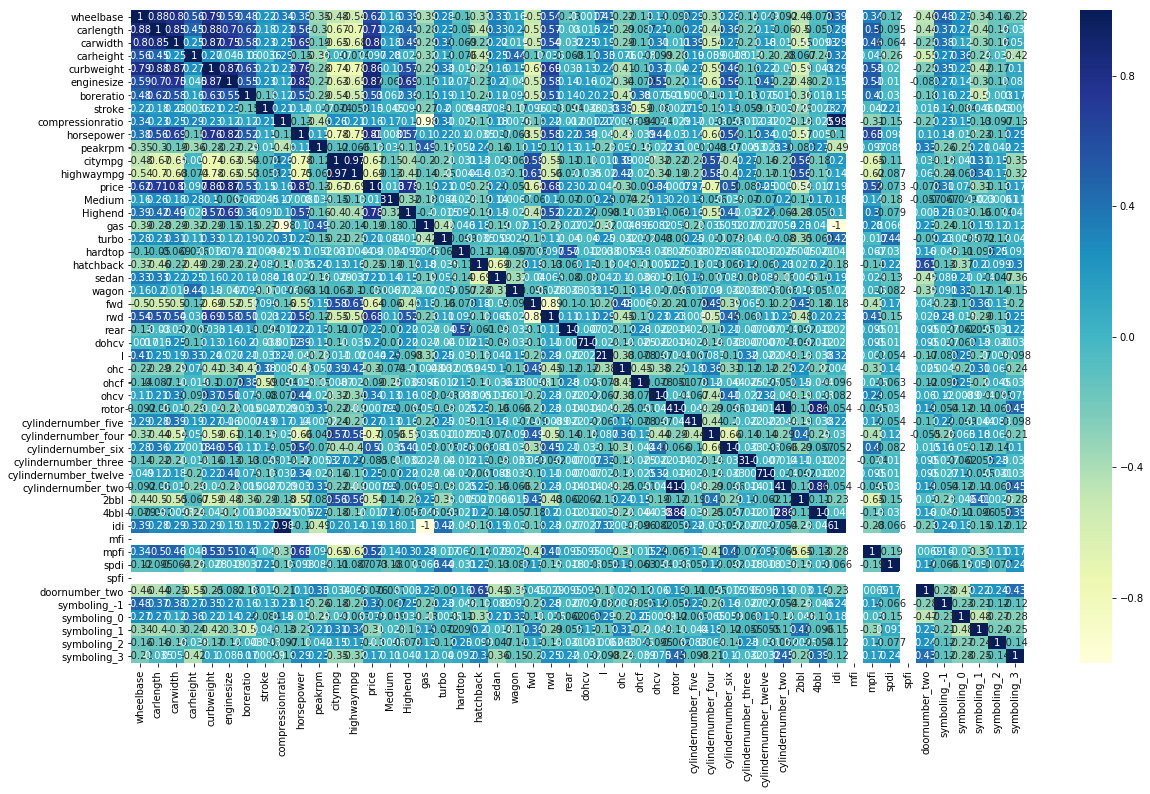

In [89]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 12))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y sets for the model building

In [90]:
y_train = df_train.pop('price')
X_train = df_train

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

### RFE
Recursive feature elimination

In [91]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [92]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 12)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [93]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 8),
 ('carlength', False, 26),
 ('carwidth', True, 1),
 ('carheight', False, 35),
 ('curbweight', True, 1),
 ('enginesize', False, 2),
 ('boreratio', False, 4),
 ('stroke', False, 5),
 ('compressionratio', False, 9),
 ('horsepower', True, 1),
 ('peakrpm', False, 17),
 ('citympg', False, 25),
 ('highwaympg', False, 20),
 ('Medium', False, 24),
 ('Highend', True, 1),
 ('gas', False, 29),
 ('turbo', False, 21),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 23),
 ('rwd', False, 28),
 ('rear', True, 1),
 ('dohcv', True, 1),
 ('l', False, 27),
 ('ohc', False, 7),
 ('ohcf', False, 11),
 ('ohcv', False, 18),
 ('rotor', True, 1),
 ('cylindernumber_five', False, 30),
 ('cylindernumber_four', False, 10),
 ('cylindernumber_six', False, 31),
 ('cylindernumber_three', True, 1),
 ('cylindernumber_twelve', False, 3),
 ('cylindernumber_two', False, 6),
 ('2bbl', False, 32),
 ('4bbl', False, 33),
 ('idi', False, 22),
 ('mf

In [94]:
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'horsepower', 'Highend', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'rear', 'dohcv', 'rotor',
       'cylindernumber_three'],
      dtype='object')

In [95]:
eliminatecols = X_train.columns[~rfe.support_]
eliminatecols

Index(['wheelbase', 'carlength', 'carheight', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'peakrpm', 'citympg', 'highwaympg',
       'Medium', 'gas', 'turbo', 'fwd', 'rwd', 'l', 'ohc', 'ohcf', 'ohcv',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_twelve', 'cylindernumber_two', '2bbl', '4bbl', 'idi',
       'mfi', 'mpfi', 'spdi', 'spfi', 'doornumber_two', 'symboling_-1',
       'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [96]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [97]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm  

In [98]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     134.7
Date:                Fri, 10 Jan 2020   Prob (F-statistic):           3.77e-67
Time:                        18:56:54   Log-Likelihood:                -1298.3
No. Observations:                 143   AIC:                             2623.
Df Residuals:                     130   BIC:                             2661.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4267.6501 

In [99]:
temp = X_train_rfe.drop(["const"], axis = 1)

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = temp.columns
vif['VIF'] = [variance_inflation_factor(temp.values, i) for i in range(temp.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,39.92
0,carwidth,37.89
2,horsepower,11.70
6,sedan,5.10
5,hatchback,3.33
7,wagon,2.13
3,Highend,1.94
8,rear,1.71
4,hardtop,1.61
9,dohcv,1.50


In [100]:
#`rotor` has high p value; can be dropped
X_train_new = X_train_rfe.drop(["rotor"], axis = 1)

In [101]:
#Rebuilding the model without `rotor`

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     144.7
Date:                Fri, 10 Jan 2020   Prob (F-statistic):           1.22e-67
Time:                        18:56:54   Log-Likelihood:                -1299.9
No. Observations:                 143   AIC:                             2624.
Df Residuals:                     131   BIC:                             2659.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4219.6705 

In [102]:
temp = X_train_lm.drop(["const"], axis = 1)

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = temp.columns
vif['VIF'] = [variance_inflation_factor(temp.values, i) for i in range(temp.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,39.84
0,carwidth,37.81
2,horsepower,11.65
6,sedan,5.09
5,hatchback,3.29
7,wagon,2.12
3,Highend,1.94
8,rear,1.71
4,hardtop,1.61
9,dohcv,1.50


In [103]:
#`hardtop` has high p value; can be dropped
X_train_new = X_train_new.drop(["hardtop"], axis = 1)

In [104]:
#Rebuilding the model without `hardtop`

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     155.6
Date:                Fri, 10 Jan 2020   Prob (F-statistic):           5.86e-68
Time:                        18:56:54   Log-Likelihood:                -1301.9
No. Observations:                 143   AIC:                             2626.
Df Residuals:                     132   BIC:                             2658.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2931.0010 

In [105]:
temp = X_train_lm.drop(["const"], axis = 1)

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = temp.columns
vif['VIF'] = [variance_inflation_factor(temp.values, i) for i in range(temp.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,39.83
0,carwidth,37.03
2,horsepower,11.65
5,sedan,4.83
4,hatchback,3.15
6,wagon,2.06
3,Highend,1.92
8,dohcv,1.49
7,rear,1.20
9,cylindernumber_three,1.06


In [106]:
#`dohcv` has high p value; can be dropped
X_train_new = X_train_new.drop(["dohcv"], axis = 1)

In [107]:
#Rebuilding the model without `dohcv`

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     169.1
Date:                Fri, 10 Jan 2020   Prob (F-statistic):           2.67e-68
Time:                        18:56:54   Log-Likelihood:                -1303.8
No. Observations:                 143   AIC:                             2628.
Df Residuals:                     133   BIC:                             2657.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 3104.1340 

In [108]:
temp = X_train_lm.drop(["const"], axis = 1)

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = temp.columns
vif['VIF'] = [variance_inflation_factor(temp.values, i) for i in range(temp.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,34.02
1,curbweight,32.43
2,horsepower,9.24
5,sedan,4.71
4,hatchback,3.08
6,wagon,2.06
3,Highend,1.88
7,rear,1.15
8,cylindernumber_three,1.06


In [109]:
#`carwidth` has high Vif; can be dropped
X_train_new = X_train_new.drop(["carwidth"], axis = 1)

In [110]:
#Rebuilding the model without `carwidth`

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     169.7
Date:                Fri, 10 Jan 2020   Prob (F-statistic):           3.10e-66
Time:                        18:56:55   Log-Likelihood:                -1311.8
No. Observations:                 143   AIC:                             2642.
Df Residuals:                     134   BIC:                             2668.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 3875.5165 

In [111]:
temp = X_train_lm.drop(["const"], axis = 1)

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = temp.columns
vif['VIF'] = [variance_inflation_factor(temp.values, i) for i in range(temp.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,14.62
1,horsepower,9.21
4,sedan,3.28
3,hatchback,2.09
5,wagon,1.94
2,Highend,1.87
6,rear,1.15
7,cylindernumber_three,1.04


In [112]:
#`sedan` has high p value; can be dropped
X_train_new = X_train_new.drop(["sedan"], axis = 1)

In [113]:
#Rebuilding the model without `sedan`

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     193.0
Date:                Fri, 10 Jan 2020   Prob (F-statistic):           4.59e-67
Time:                        18:56:55   Log-Likelihood:                -1312.6
No. Observations:                 143   AIC:                             2641.
Df Residuals:                     135   BIC:                             2665.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2712.2369 

In [114]:
temp = X_train_lm.drop(["const"], axis = 1)

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = temp.columns
vif['VIF'] = [variance_inflation_factor(temp.values, i) for i in range(temp.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,horsepower,9.01
0,curbweight,8.67
2,Highend,1.77
3,hatchback,1.47
4,wagon,1.32
5,rear,1.15
6,cylindernumber_three,1.03


In [115]:
#`cylindernumber_three` has high p value; can be dropped
X_train_new = X_train_new.drop(["cylindernumber_three"], axis = 1)

In [116]:
#Rebuilding the model without `cylindernumber_three`

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     223.3
Date:                Fri, 10 Jan 2020   Prob (F-statistic):           7.65e-68
Time:                        18:56:55   Log-Likelihood:                -1313.6
No. Observations:                 143   AIC:                             2641.
Df Residuals:                     136   BIC:                             2662.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2813.7227    562.023      5.006      0.0

In [117]:
temp = X_train_lm.drop(["const"], axis = 1)

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = temp.columns
vif['VIF'] = [variance_inflation_factor(temp.values, i) for i in range(temp.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,horsepower,8.99
0,curbweight,8.67
2,Highend,1.77
3,hatchback,1.43
4,wagon,1.32
5,rear,1.15


In [118]:
#`hatchback` has high p value; can be dropped
X_train_new = X_train_new.drop(["hatchback"], axis = 1)

In [119]:
#Rebuilding the model without `hatchback`

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     262.0
Date:                Fri, 10 Jan 2020   Prob (F-statistic):           2.85e-68
Time:                        18:56:55   Log-Likelihood:                -1315.5
No. Observations:                 143   AIC:                             2643.
Df Residuals:                     137   BIC:                             2661.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2243.8640    483.811      4.638      0.0

In [120]:
temp = X_train_lm.drop(["const"], axis = 1)

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = temp.columns
vif['VIF'] = [variance_inflation_factor(temp.values, i) for i in range(temp.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,8.66
1,horsepower,8.38
2,Highend,1.61
3,wagon,1.28
4,rear,1.14


In [121]:
#`curbweight` has high VIF; can be dropped
X_train_new = X_train_new.drop(["curbweight"], axis = 1)

In [122]:
#Rebuilding the model without `curbweight`

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     140.2
Date:                Fri, 10 Jan 2020   Prob (F-statistic):           1.37e-47
Time:                        18:56:56   Log-Likelihood:                -1368.1
No. Observations:                 143   AIC:                             2746.
Df Residuals:                     138   BIC:                             2761.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5935.4956    542.970     10.932      0.0

In [123]:
temp = X_train_lm.drop(["const"], axis = 1)

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = temp.columns
vif['VIF'] = [variance_inflation_factor(temp.values, i) for i in range(temp.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,1.67
1,Highend,1.60
2,wagon,1.08
3,rear,1.07


In [124]:
#`rear` has high p-value; can be dropped
X_train_new = X_train_new.drop(["rear"], axis = 1)

In [125]:
#Rebuilding the model without `rear`

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     188.3
Date:                Fri, 10 Jan 2020   Prob (F-statistic):           9.21e-49
Time:                        18:56:56   Log-Likelihood:                -1368.1
No. Observations:                 143   AIC:                             2744.
Df Residuals:                     139   BIC:                             2756.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5932.4044    539.001     11.006      0.0

In [126]:
temp = X_train_lm.drop(["const"], axis = 1)

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = temp.columns
vif['VIF'] = [variance_inflation_factor(temp.values, i) for i in range(temp.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,1.66
1,Highend,1.57
2,wagon,1.08


In [127]:
#`wagon` has high p-value; can be dropped
X_train_new = X_train_new.drop(["wagon"], axis = 1)

In [128]:
#Rebuilding the model without `wagon`

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     284.4
Date:                Fri, 10 Jan 2020   Prob (F-statistic):           4.88e-50
Time:                        18:56:56   Log-Likelihood:                -1368.1
No. Observations:                 143   AIC:                             2742.
Df Residuals:                     140   BIC:                             2751.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5910.6155    517.956     11.411      0.0

In [129]:
temp = X_train_lm.drop(["const"], axis = 1)

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = temp.columns
vif['VIF'] = [variance_inflation_factor(temp.values, i) for i in range(temp.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,1.56
1,Highend,1.56


## Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [130]:
y_train_price = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

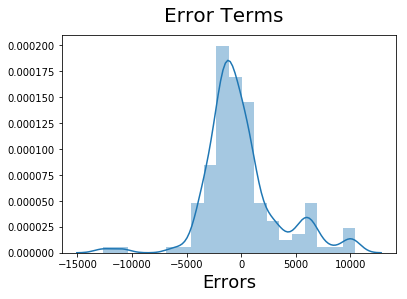

In [131]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [132]:
# Apply scaler() to all the columns except the '1-0' and 'dummy' variables
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','enginesize', 'boreratio', 'stroke',
            'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [133]:
df_test.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,mfi,mpfi,spdi,spfi,doornumber_two,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.437764,0.559481,0.480376,0.559663,0.428470,0.265673,0.556580,0.544314,0.209375,0.248858,...,0.016129,0.500000,0.048387,0.016129,0.435484,0.145161,0.274194,0.177419,0.241935,0.145161
std,0.212861,0.189947,0.165440,0.215811,0.179488,0.162820,0.228484,0.160738,0.273690,0.163376,...,0.127000,0.504082,0.216335,0.127000,0.499868,0.355139,0.449749,0.385142,0.431751,0.355139
min,0.000000,0.056911,0.183333,0.141593,0.128394,0.067925,-0.111111,-0.060606,0.000000,0.016667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.313793,0.459350,0.358333,0.384956,0.305275,0.177358,0.404762,0.484848,0.093750,0.107292,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.387931,0.547967,0.441667,0.588496,0.406129,0.226415,0.563492,0.585859,0.125000,0.218750,...,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.570690,0.719919,0.516667,0.699115,0.564876,0.316038,0.746032,0.641414,0.150000,0.295833,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.182759,1.089431,0.975000,1.061947,0.935609,0.932075,0.888889,0.863636,1.000000,0.662500,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [134]:
y_test = df_test.pop('price')
X_test = df_test

In [135]:
# Adding constant variable to test dataframe
X_test_new = sm.add_constant(X_test)

In [136]:
# Creating X_test_new dataframe by dropping variables from X_test_new

X_test_new = X_test_new.drop(eliminatecols, axis = 1)
X_test_new = X_test_new.drop(['rotor', 'hardtop', 'dohcv', 'carwidth', 'sedan', 
                              'cylindernumber_three', 'hatchback', 'curbweight', 'rear', 'wagon'], axis = 1)

In [137]:
# Making predictions using the model

y_pred_price = lm.predict(X_test_new)

## Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred_price')

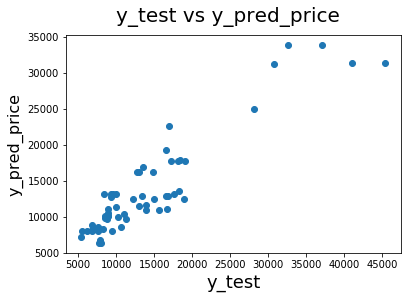

In [138]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_price)
fig.suptitle('y_test vs y_pred_price', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred_price', fontsize = 16)      

In [139]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_price)

0.8375183499217066

### Variables 'horsepower' and 'Highend' are significant in predicting the price for cars.